In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the data
df =pd.read_csv('train_revised.csv')

In [5]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [9]:
# Number of elements
df.count()

ride_id            51645
seat_number        51645
payment_method     51645
payment_receipt    51645
travel_date        51645
travel_time        51645
travel_from        51645
travel_to          51645
car_type           51645
max_capacity       51645
dtype: int64

In [74]:
# Gives information about the  dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ride_id           51645 non-null  int64         
 1   seat_number       51645 non-null  object        
 2   payment_method    51645 non-null  object        
 3   payment_receipt   51645 non-null  object        
 4   travel_date       51645 non-null  datetime64[ns]
 5   travel_time       51645 non-null  object        
 6   travel_from       51645 non-null  object        
 7   travel_to         51645 non-null  object        
 8   car_type          51645 non-null  object        
 9   max_capacity      51645 non-null  int64         
 10  day_of_week_name  51645 non-null  object        
 11  year              51645 non-null  int64         
 12  month             51645 non-null  int64         
 13  day               51645 non-null  int64         
 14  is_leap_year      5164

In [75]:
# Returning the data type of dataframe
df.dtypes

ride_id                      int64
seat_number                 object
payment_method              object
payment_receipt             object
travel_date         datetime64[ns]
travel_time                 object
travel_from                 object
travel_to                   object
car_type                    object
max_capacity                 int64
day_of_week_name            object
year                         int64
month                        int64
day                          int64
is_leap_year                  bool
date_time           datetime64[ns]
dtype: object

In [76]:
# Checking sum of null values
df.isnull().sum()

ride_id             0
seat_number         0
payment_method      0
payment_receipt     0
travel_date         0
travel_time         0
travel_from         0
travel_to           0
car_type            0
max_capacity        0
day_of_week_name    0
year                0
month               0
day                 0
is_leap_year        0
date_time           0
dtype: int64

In [77]:
#Get the week of year, the day of week 
dw_mapping ={
       0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
}

df['day_of_week_name']=df['travel_date'].dt.weekday.map(dw_mapping)

In [78]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week_name,year,month,day,is_leap_year,date_time
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday,2017,10,17,False,2017-10-17
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday,2017,11,19,False,2017-11-19
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday,2017,11,26,False,2017-11-26
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Monday,2017,11,27,False,2017-11-27
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,Monday,2017,11,27,False,2017-11-27


In [79]:
#Handle parsing error
df['travel_date'] = pd.to_datetime(df['travel_date'], errors='coerce')
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week_name,year,month,day,is_leap_year,date_time
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday,2017,10,17,False,2017-10-17
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday,2017,11,19,False,2017-11-19
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday,2017,11,26,False,2017-11-26
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Monday,2017,11,27,False,2017-11-27
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,Monday,2017,11,27,False,2017-11-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20


In [80]:
# Get the week of year, the day of week and leap year

df['year']= df['travel_date'].dt.year
df['month']= df['travel_date'].dt.month
df['day']= df['travel_date'].dt.day
df['is_leap_year'] = df['travel_date'].dt.is_leap_year
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week_name,year,month,day,is_leap_year,date_time
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday,2017,10,17,False,2017-10-17
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday,2017,11,19,False,2017-11-19
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday,2017,11,26,False,2017-11-26
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Monday,2017,11,27,False,2017-11-27
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,Monday,2017,11,27,False,2017-11-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20


In [81]:
df['date_time'] = pd.to_datetime(df['travel_date'], dayfirst=True)

In [82]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week_name,year,month,day,is_leap_year,date_time
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday,2017,10,17,False,2017-10-17
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday,2017,11,19,False,2017-11-19
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday,2017,11,26,False,2017-11-26
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Monday,2017,11,27,False,2017-11-27
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,Monday,2017,11,27,False,2017-11-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20


In [83]:
#Selecting Sundays in dataFrame
sundays = df[df["day_of_week_name"] == "Sunday"]

In [84]:
sundays.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week_name,year,month,day,is_leap_year,date_time
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday,2017,11,19,False,2017-11-19
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday,2017,11,26,False,2017-11-26
111,5856,9,Cash,MDF1ULUMPX,2018-04-15,5:20,Kisii,Nairobi,shuttle,11,Sunday,2018,4,15,False,2018-04-15
112,5857,6,Cash,MDF1ULG1GR,2018-04-15,5:00,Kisii,Nairobi,shuttle,11,Sunday,2018,4,15,False,2018-04-15
113,5857,3,Cash,MDF6ULD8NQ,2018-04-15,5:00,Kisii,Nairobi,shuttle,11,Sunday,2018,4,15,False,2018-04-15


In [85]:
# Give Statistical
sundays.describe()

,ride_id,max_capacity,year,month,day
count,6847.000000,6847.000000,6847.000000,6847.000000,6847.000000
mean,10332.645684,36.140938,2017.796407,6.056083,12.757558
std,2102.351938,17.981549,0.402699,4.297008,9.287450
min,5437.000000,11.000000,2017.000000,1.000000,1.000000
25%,8399.000000,11.000000,2018.000000,2.000000,3.000000
50%,10343.000000,49.000000,2018.000000,4.000000,14.000000
75%,12419.500000,49.000000,2018.000000,11.000000,18.000000
max,13569.000000,49.000000,2018.000000,12.000000,31.000000


In [86]:
sundays.travel_to.unique() 

# they final destination in all routes was nairobi hence is will use only travel to 

array(['Nairobi'], dtype=object)

(array([1014., 2756.,  541.,  910.,  115.,  386.,  296.,  638.,   63.,
         128.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

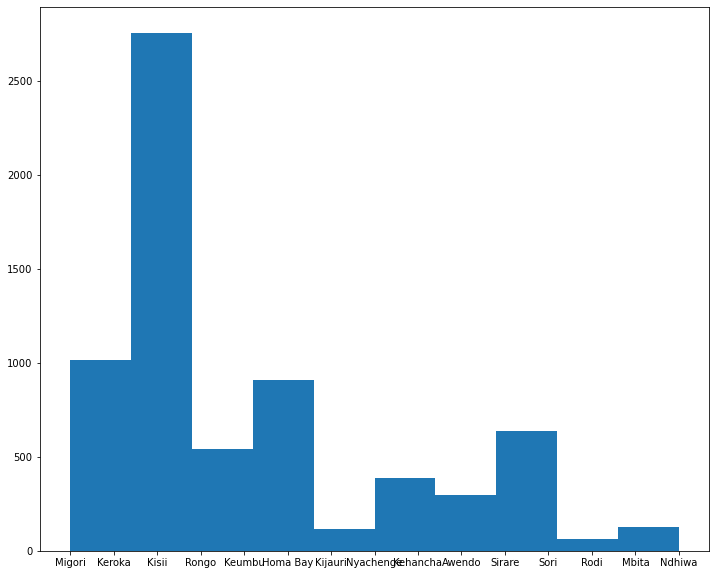

In [87]:
plt.figure(figsize=(12, 10))
plt.hist(sundays.travel_from)

In [88]:
# Group sundays by mean
grouped=sundays.groupby(['travel_from']).mean().reset_index()
grouped

,travel_from,ride_id,max_capacity,year,month,day,is_leap_year
0,Awendo,12094.074324,49.000000,2018.000000,4.668919,10.280405,0.0
1,Homa Bay,10408.113187,49.000000,2017.801099,6.251648,14.895604,0.0
2,Kehancha,11818.923588,49.000000,2018.000000,5.269103,9.225914,0.0
3,Keroka,9619.219512,40.658537,2017.707317,4.414634,14.341463,0.0
4,Keumbu,6492.666667,11.000000,2017.000000,2.666667,12.000000,0.0
5,Kijauri,11066.313043,29.504348,2017.826087,6.791304,12.782609,0.0
6,Kisii,9292.977141,18.031930,2017.690131,6.531567,12.894412,0.0
7,Mbita,13433.542169,49.000000,2018.000000,7.457831,9.566265,0.0
8,Migori,10519.857143,49.000000,2017.787256,5.995889,13.522097,0.0
9,Ndhiwa,13455.155556,49.000000,2018.000000,7.577778,9.377778,0.0


In [89]:
# Descending order
grouped.sort_index(ascending= False)

,travel_from,ride_id,max_capacity,year,month,day,is_leap_year
14,Sori,13400.000000,49.000000,2018.000000,8.666667,7.666667,0.0
13,Sirare,11632.971383,49.000000,2018.000000,4.615262,11.653418,0.0
12,Rongo,10373.315985,49.000000,2017.782528,6.042751,12.763941,0.0
11,Rodi,13462.238095,49.000000,2018.000000,6.666667,10.809524,0.0
10,Nyachenge,11976.141176,49.000000,2018.000000,4.611765,12.058824,0.0
9,Ndhiwa,13455.155556,49.000000,2018.000000,7.577778,9.377778,0.0
8,Migori,10519.857143,49.000000,2017.787256,5.995889,13.522097,0.0
7,Mbita,13433.542169,49.000000,2018.000000,7.457831,9.566265,0.0
6,Kisii,9292.977141,18.031930,2017.690131,6.531567,12.894412,0.0
5,Kijauri,11066.313043,29.504348,2017.826087,6.791304,12.782609,0.0


In [90]:
# Group by day of the week  by count
df.groupby(['day_of_week_name','travel_from']).count()

ride_id  seat_number  payment_method  \
day_of_week_name travel_from                                         
Friday           Awendo           297          297             297   
                 Homa Bay         920          920             920   
                 Kehancha         236          236             236   
                 Kendu Bay          1            1               1   
                 Keroka            75           75              75   
...                               ...          ...             ...   
Wednesday        Nyachenge         58           58              58   
                 Rodi              39           39              39   
                 Rongo            612          612             612   
                 Sirare           685          685             685   
                 Sori               7            7               7   

                              payment_receipt  travel_date  travel_time  \
day_of_week_name travel_from                                              
Friday           Awendo                   297          297          297   
                 Homa Bay                 920          920          920   
                 Kehancha                 236          236          236   
                 Kendu Bay                  1            1            1   
                 Keroka                    75           75           75   
...                                       ...          ...          ...   
Wednesday        Nyachenge                 58           58           58   
                 Rodi                      39           39           39   
                 Rongo                    612          612          612   
                 Sirare                   685          685          685   
                 Sori                       7            7            7   

                              travel_to  car_type  max_capacity  year  month  \
day_of_week_name travel_from                                                   
Friday           Awendo             297       297           297   297    297   
                 Homa Bay           920       920           920   920    920   
                 Kehancha           236       236           236   236    236   
                 Kendu Bay            1         1             1     1      1   
                 Keroka              75        75            75    75     75   
...                                 ...       ...           ...   ...    ...   
Wednesday        Nyachenge           58        58            58    58     58   
                 Rodi                39        39            39    39     39   
                 Rongo              612       612           612   612    612   
                 Sirare             685       685           685   685    685   
                 Sori                 7         7             7     7      7   

                              day  is_leap_year  date_time  
day_of_week_name travel_from                                
Friday           Awendo       297           297        297  
                 Homa Bay     920           920        920  
                 Kehancha     236           236        236  
                 Kendu Bay      1             1          1  
                 Keroka        75            75         75  
...                           ...           ...        ...  
Wednesday        Nyachenge     58            58         58  
                 Rodi          39            39         39  
                 Rongo        612           612        612  
                 Sirare       685           685        685  
                 Sori           7             7          7  

[108 rows x 14 columns]

In [91]:
# Group by day of the week  by sum
df.groupby(['day_of_week_name','travel_from']).sum()

ride_id  max_capacity     year  month    day  \
day_of_week_name travel_from                                                 
Friday           Awendo       3592189         14553   599344   1152   5005   
                 Homa Bay     9487885         45080  1856351   4836  13412   
                 Kehancha     2844838         11564   476248   1103   3526   
                 Kendu Bay       9190            49     2018      1     26   
                 Keroka        740418          2839   151336    264    969   
...                               ...           ...      ...    ...    ...   
Wednesday        Nyachenge     702162          2842   117044    265    760   
                 Rodi          528731          1911    78702    171    603   
                 Rongo        6291605         29988  1234860   2995   9730   
                 Sirare       7759117         33565  1382330   2521   8706   
                 Sori           95952           343    14126     28    126   

                              is_leap_year  
day_of_week_name travel_from                
Friday           Awendo                  0  
                 Homa Bay                0  
                 Kehancha                0  
                 Kendu Bay               0  
                 Keroka                  0  
...                                    ...  
Wednesday        Nyachenge               0  
                 Rodi                    0  
                 Rongo                   0  
                 Sirare                  0  
                 Sori                    0  

[108 rows x 6 columns]

# Problem 2

In [92]:
#Selecting Kijauri from the dateFrame
kijauri_travels = df[df["travel_from"] == "Kijauri"]
kijauri_travels
 

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week_name,year,month,day,is_leap_year,date_time
1625,6560,1A,Mpesa,XY20JTZHY4,2017-04-12,7:07,Kijauri,Nairobi,Bus,49,Wednesday,2017,4,12,False,2017-04-12
1658,6568,9,Mpesa,EJXHRAFPCQ,2017-04-12,7:00,Kijauri,Nairobi,shuttle,11,Wednesday,2017,4,12,False,2017-04-12
1663,6560,21B,Mpesa,QVBJ6ZAT75,2017-04-12,7:07,Kijauri,Nairobi,Bus,49,Wednesday,2017,4,12,False,2017-04-12
1685,6570,20B,Mpesa,0KBEL0BJDK,2017-04-12,7:06,Kijauri,Nairobi,Bus,49,Wednesday,2017,4,12,False,2017-04-12
1700,6568,10,Mpesa,IFXMNKI8NO,2017-04-12,7:00,Kijauri,Nairobi,shuttle,11,Wednesday,2017,4,12,False,2017-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51074,13755,2,Mpesa,IXUDNPSSZ0,2018-04-19,10:52,Kijauri,Nairobi,shuttle,11,Thursday,2018,4,19,False,2018-04-19
51156,13769,5,Mpesa,PU4LHLHZVC,2018-04-19,6:20,Kijauri,Nairobi,shuttle,11,Thursday,2018,4,19,False,2018-04-19
51446,13800,1A,Mpesa,7H5OTXKINU,2018-04-20,7:06,Kijauri,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20
51468,13804,5,Mpesa,D8LAUAHLFB,2018-04-20,7:50,Kijauri,Nairobi,shuttle,11,Friday,2018,4,20,False,2018-04-20


In [93]:
#Converting into date_time
kijauri_travels["date_time"] = pd.to_datetime(kijauri_travels.date_time)

/tmp/ipykernel_6320/1661449145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kijauri_travels["date_time"] = pd.to_datetime(kijauri_travels.date_time)


In [94]:
kijauri_travels["travel_time"] = pd.to_datetime(kijauri_travels.travel_time)

/tmp/ipykernel_6320/154384013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kijauri_travels["travel_time"] = pd.to_datetime(kijauri_travels.travel_time)


In [95]:
before_7_30 = kijauri_travels[kijauri_travels.travel_time <= "2022-05-09 07:30:00"]

In [96]:
before_7_30

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week_name,year,month,day,is_leap_year,date_time
1625,6560,1A,Mpesa,XY20JTZHY4,2017-04-12,2022-05-09 07:07:00,Kijauri,Nairobi,Bus,49,Wednesday,2017,4,12,False,2017-04-12
1658,6568,9,Mpesa,EJXHRAFPCQ,2017-04-12,2022-05-09 07:00:00,Kijauri,Nairobi,shuttle,11,Wednesday,2017,4,12,False,2017-04-12
1663,6560,21B,Mpesa,QVBJ6ZAT75,2017-04-12,2022-05-09 07:07:00,Kijauri,Nairobi,Bus,49,Wednesday,2017,4,12,False,2017-04-12
1685,6570,20B,Mpesa,0KBEL0BJDK,2017-04-12,2022-05-09 07:06:00,Kijauri,Nairobi,Bus,49,Wednesday,2017,4,12,False,2017-04-12
1700,6568,10,Mpesa,IFXMNKI8NO,2017-04-12,2022-05-09 07:00:00,Kijauri,Nairobi,shuttle,11,Wednesday,2017,4,12,False,2017-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50998,13749,4,Mpesa,8KTZUCIQ9E,2018-04-19,2022-05-09 06:10:00,Kijauri,Nairobi,shuttle,11,Thursday,2018,4,19,False,2018-04-19
51014,13752,13A,Mpesa,GCMZTDQV0T,2018-04-19,2022-05-09 07:06:00,Kijauri,Nairobi,Bus,49,Thursday,2018,4,19,False,2018-04-19
51156,13769,5,Mpesa,PU4LHLHZVC,2018-04-19,2022-05-09 06:20:00,Kijauri,Nairobi,shuttle,11,Thursday,2018,4,19,False,2018-04-19
51446,13800,1A,Mpesa,7H5OTXKINU,2018-04-20,2022-05-09 07:06:00,Kijauri,Nairobi,Bus,49,Friday,2018,4,20,False,2018-04-20


In [97]:
#Counts for shuttle 
before_7_30.car_type.value_counts()

shuttle    441
Bus        386
Name: car_type, dtype: int64

In [98]:
prob_shuttle = 441/ (386 + 441)
print(f"Probability of taking a shuttle before 7:30 is: {prob_shuttle:.4}")

Probability of taking a shuttle before 7:30 is: 0.5333


# Problem 3

In [99]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week_name,year,month,day,is_leap_year,date_time
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday,2017,10,17,False,2017-10-17
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday,2017,11,19,False,2017-11-19
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday,2017,11,26,False,2017-11-26
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Monday,2017,11,27,False,2017-11-27
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,Monday,2017,11,27,False,2017-11-27


In [100]:
# checking the length of receipt payment
for i in range(20):
    print(len(df.payment_receipt.iloc[i]))

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


In [101]:
# Giving sample of code split
new_df = pd.DataFrame(data=[["UZ", 20]], columns=["word_pair", "freq"])               

In [102]:
new_df.head()

,word_pair,freq
0,UZ,20


In [103]:

# runs in a linear time  to split the code into two characters 
pairs = []
for text in df.payment_receipt:
    for i in range(0,10,2): # gives five compinations for each payment code
        pair = text[i:i+2]
        pairs.append(pair)

In [104]:
pair_df = pd.DataFrame(data=pairs, columns=["word_pair"]) 

In [105]:
# Give  the count for each split character  
pair_df.value_counts()

word_pair
MD           324
MC           322
RF           313
ET           312
KK           311
            ... 
61            54
12            54
55            53
39            48
77            47
Length: 1296, dtype: int64

In [106]:
# The popular sequence is MD 